In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv(r'train.csv')

In [3]:
test_data = pd.read_csv(r'test.csv')

In [5]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
test_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [9]:
train_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [11]:
# Summary statistics for train data
print("Summary Statistics for Train Data:")
print(train_data.describe())

Summary Statistics for Train Data:
                  id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.

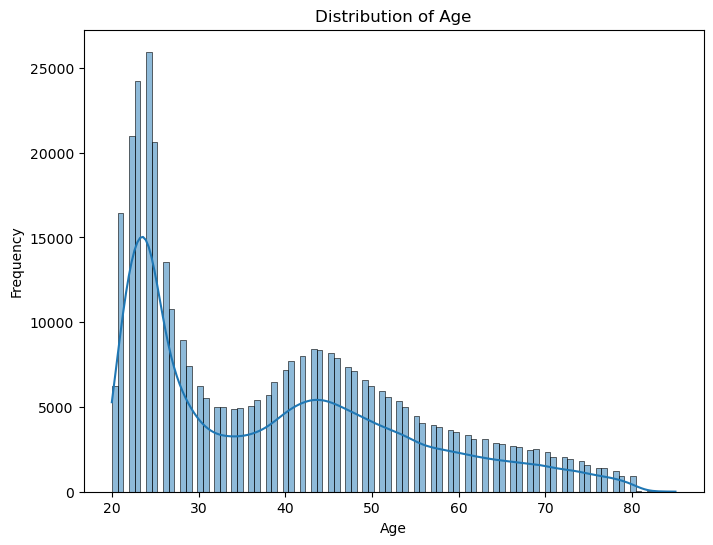

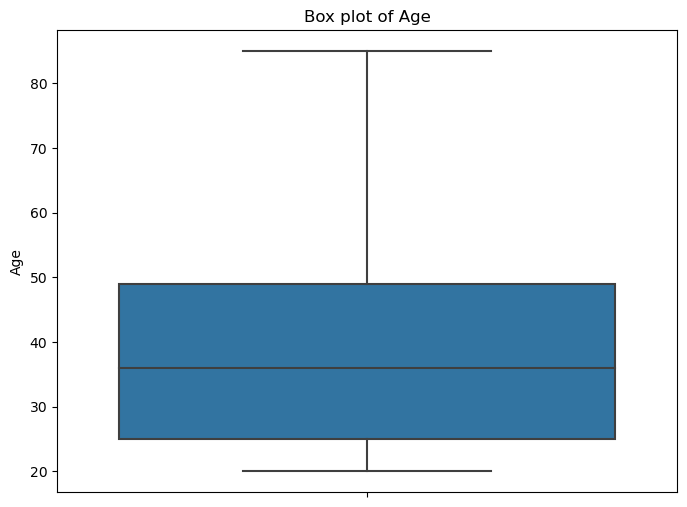

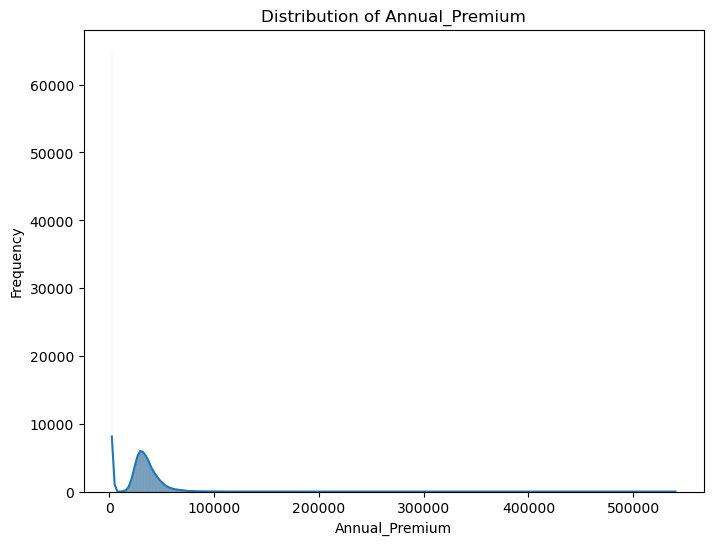

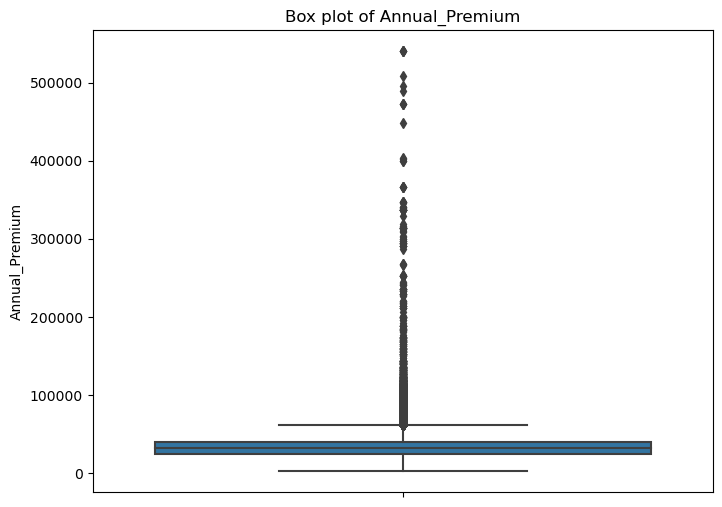

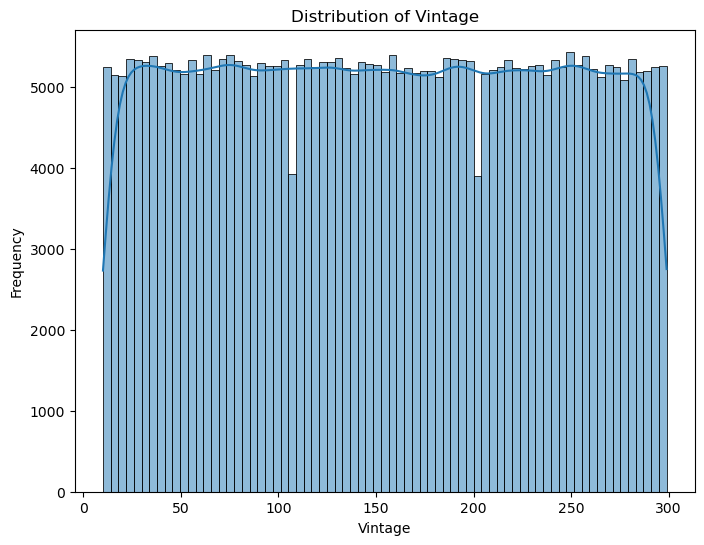

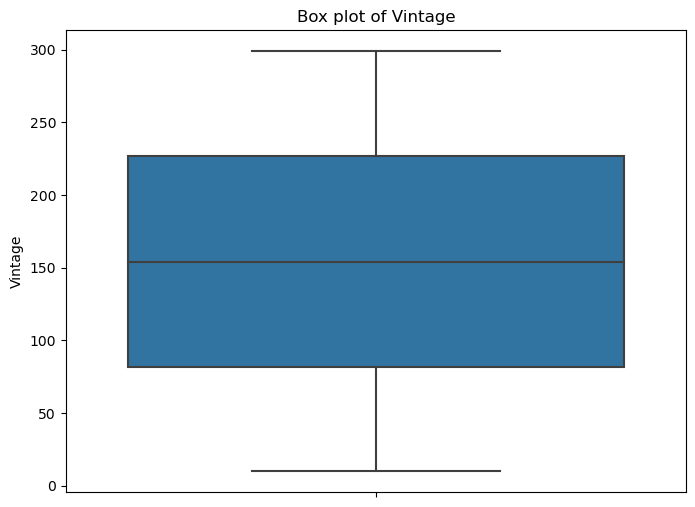

In [12]:
# Distribution of numerical features for train data
numerical_features = ['Age', 'Annual_Premium', 'Vintage']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(y=train_data[feature])
    plt.title(f'Box plot of {feature}')
    plt.ylabel(feature)
    plt.show()

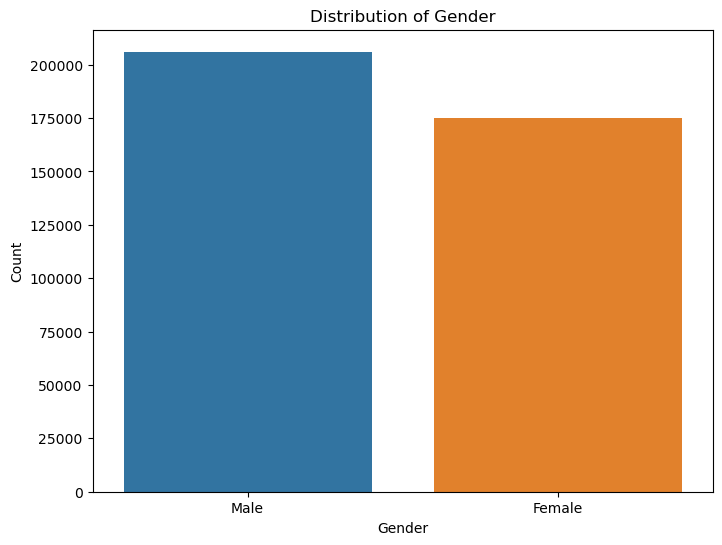

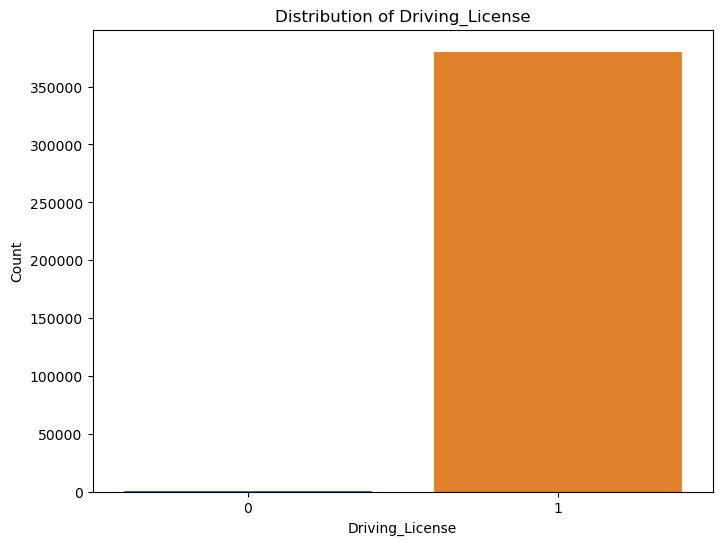

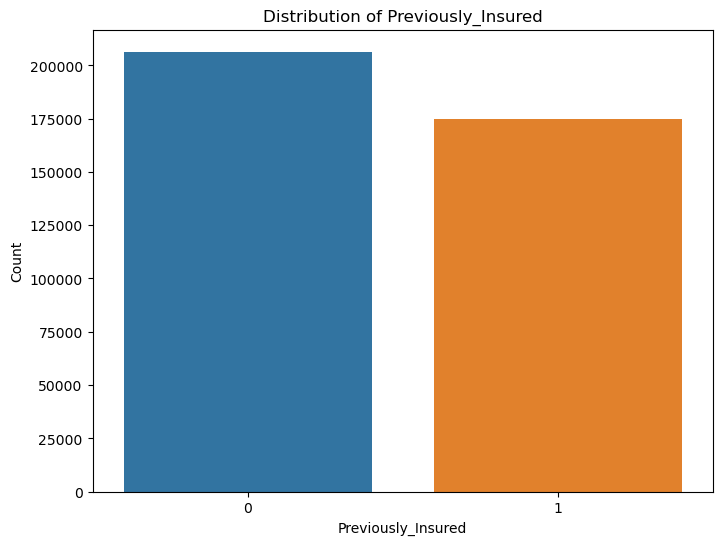

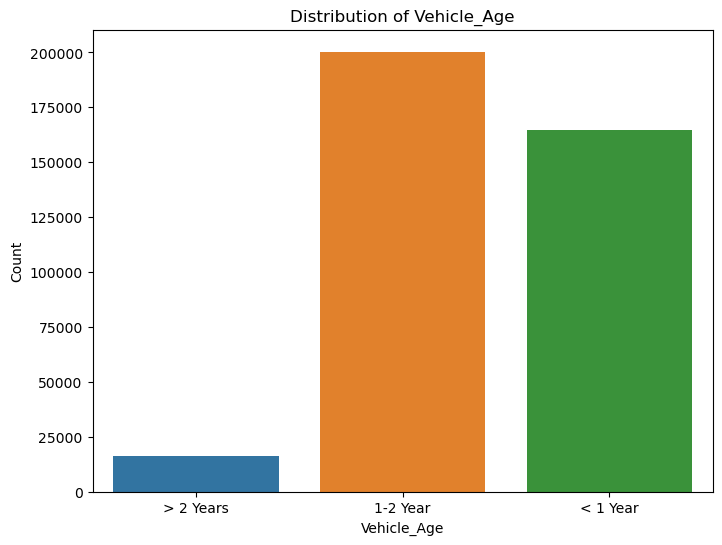

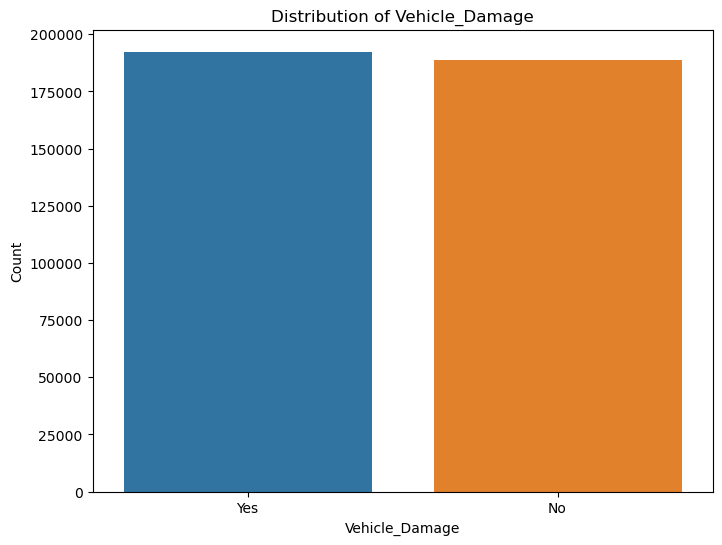

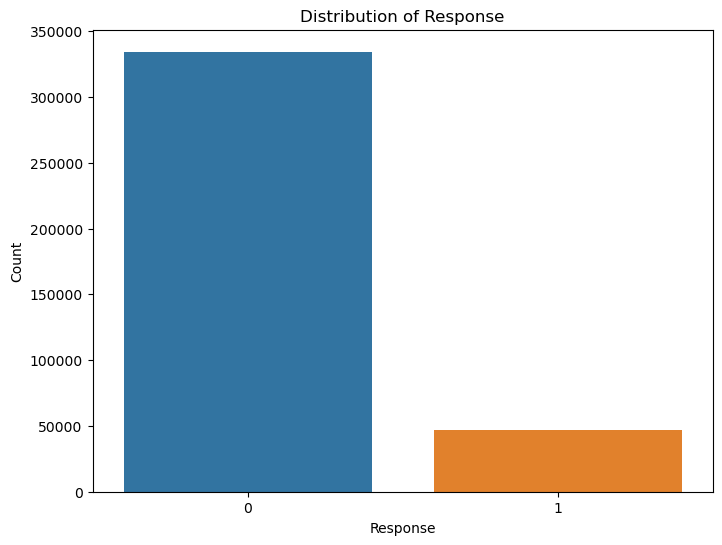

In [13]:
# Distribution of categorical variables for train data
categorical_features = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=train_data, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [14]:
# Summary statistics for test data
print("Summary Statistics for Test Data:")
print(test_data.describe())

Summary Statistics for Test Data:
                  id            Age  Driving_License    Region_Code  \
count  127037.000000  127037.000000    127037.000000  127037.000000   
mean   444628.000000      38.765903         0.998134      26.459866   
std     36672.567411      15.465814         0.043152      13.209916   
min    381110.000000      20.000000         0.000000       0.000000   
25%    412869.000000      25.000000         1.000000      15.000000   
50%    444628.000000      36.000000         1.000000      28.000000   
75%    476387.000000      49.000000         1.000000      35.000000   
max    508146.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel        Vintage  
count       127037.000000   127037.000000         127037.000000  127037.000000  
mean             0.460039    30524.643576            111.800468     154.318301  
std              0.498403    16945.297103             54.371765      83.661588  
mi

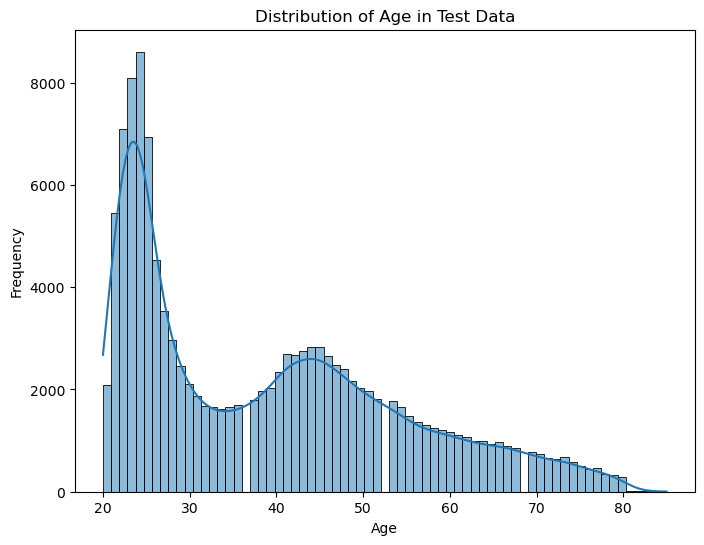

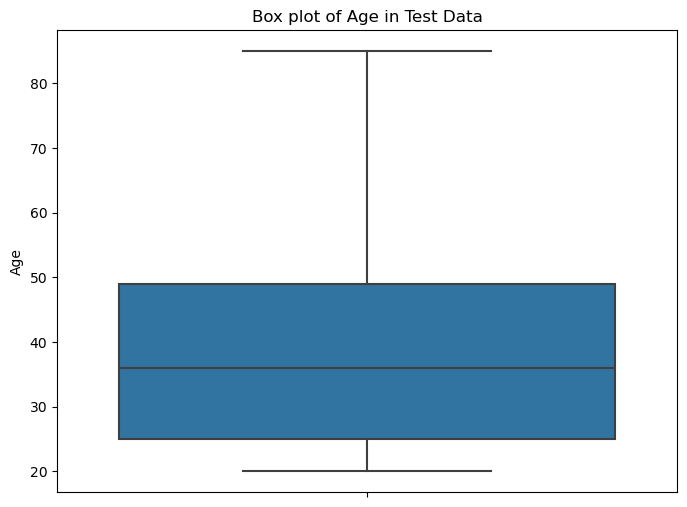

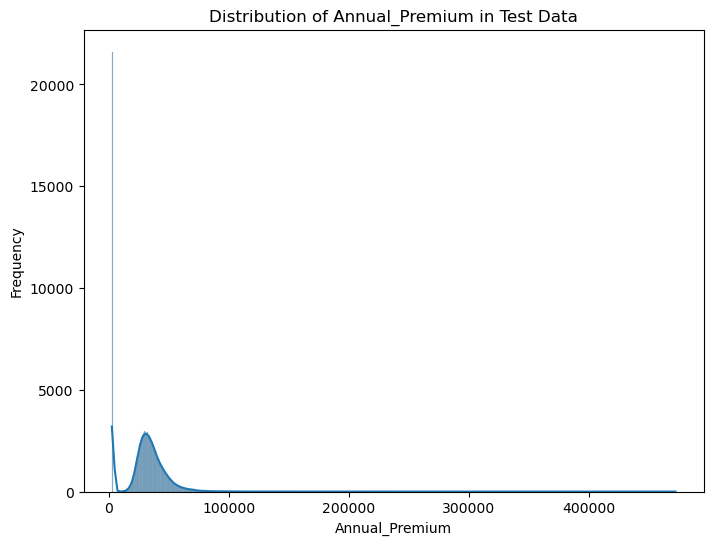

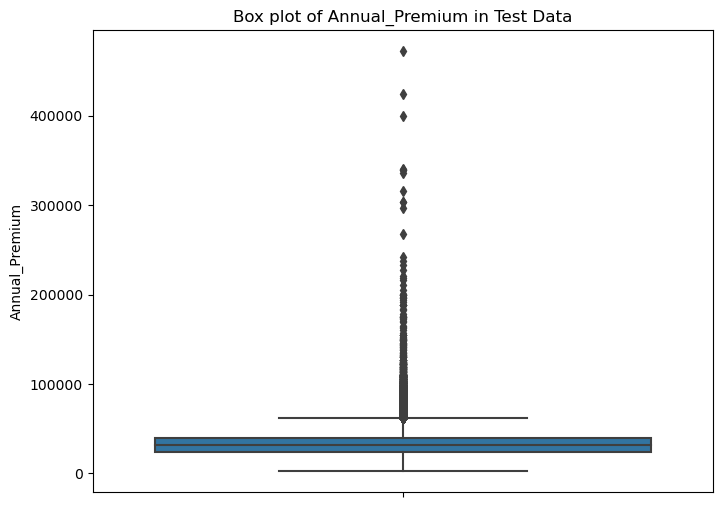

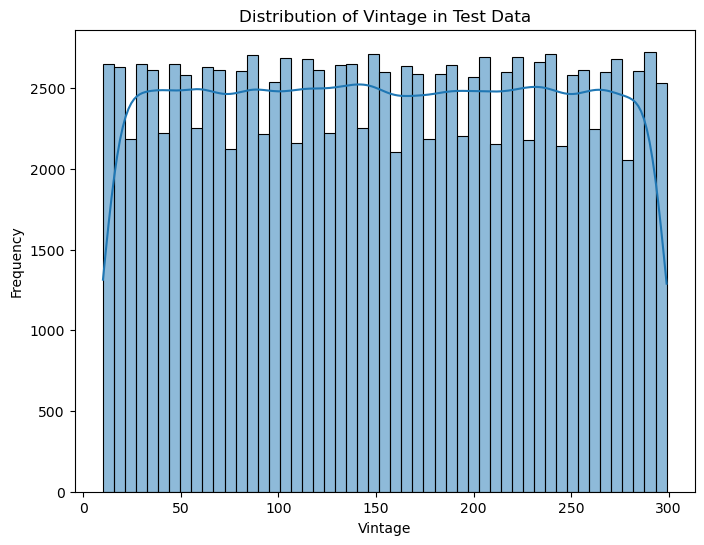

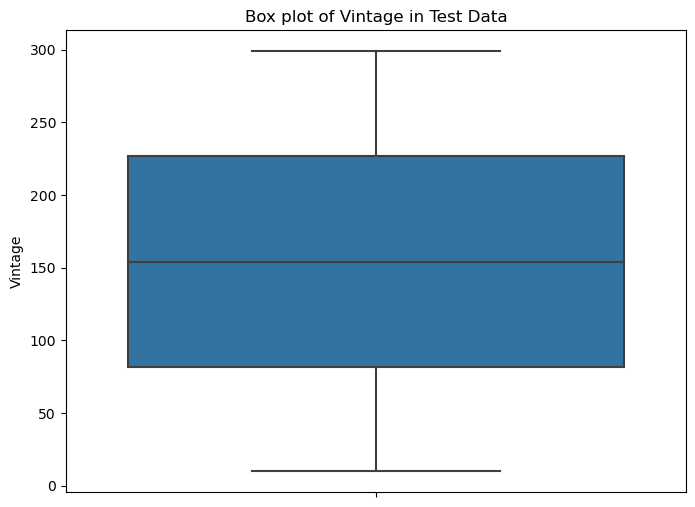

In [15]:
# Distribution of numerical features in test data
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(test_data[feature], kde=True)
    plt.title(f'Distribution of {feature} in Test Data')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(y=test_data[feature])
    plt.title(f'Box plot of {feature} in Test Data')
    plt.ylabel(feature)
    plt.show()

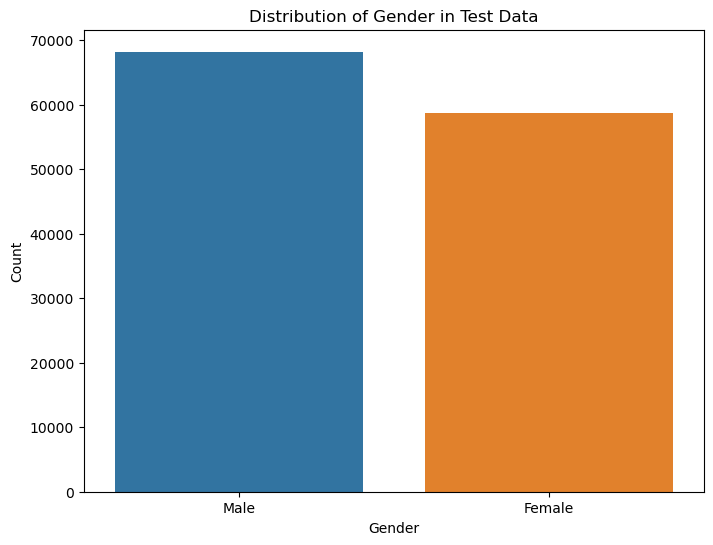

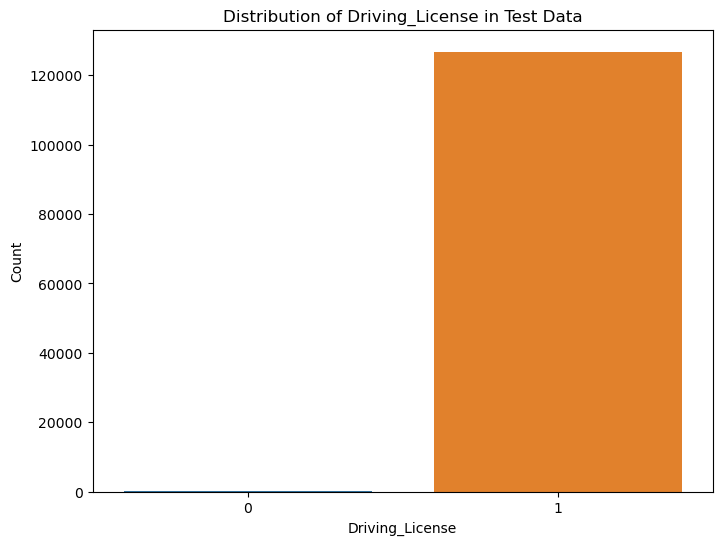

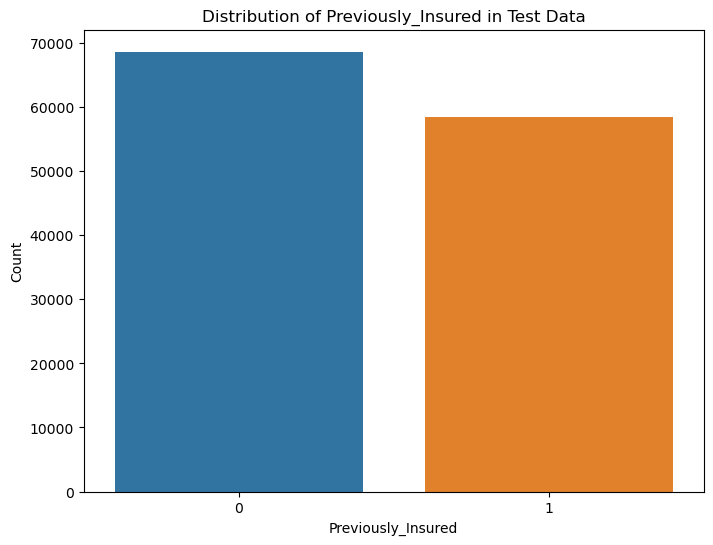

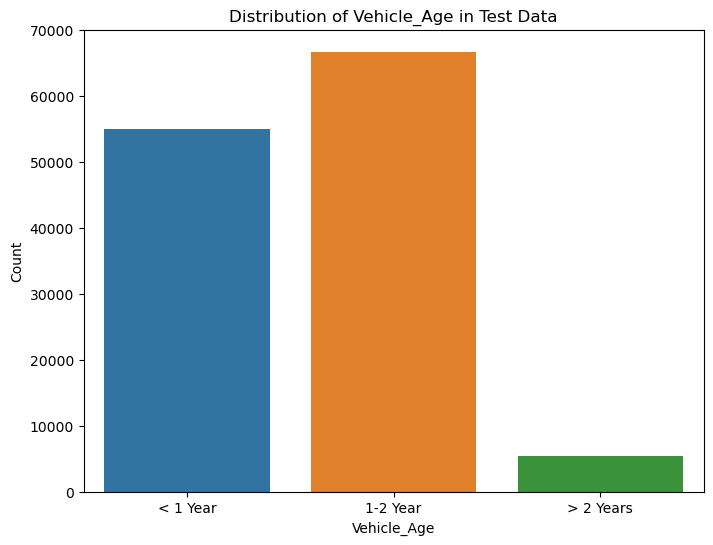

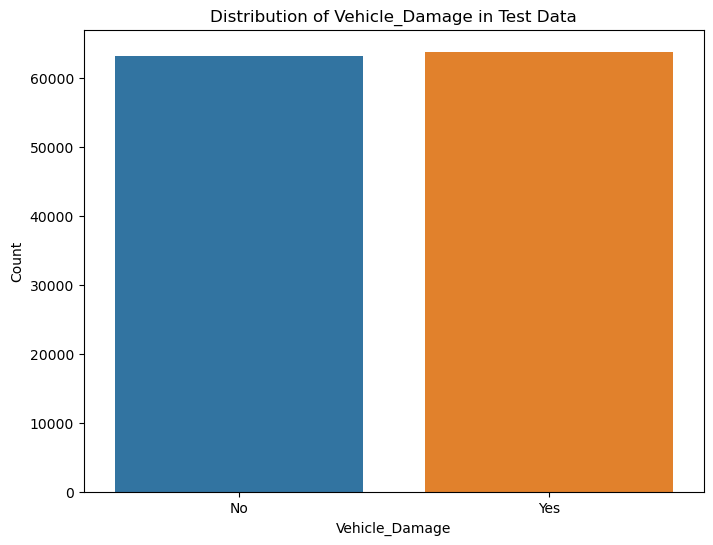

In [16]:
# Distribution of categorical variables in test data
for feature in categorical_features[:-1]:  # Excluding 'Response' since it's not present in the test data
    plt.figure(figsize=(8, 6))
    sns.countplot(data=test_data, x=feature)
    plt.title(f'Distribution of {feature} in Test Data')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
# Combine train and test data for preprocessing
combined_data = pd.concat([train_data.drop(columns=['Response']), test_data], ignore_index=True)

In [20]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [21]:
# Encode categorical variables
label_encoders = {}
for feature in ['Gender', 'Vehicle_Age', 'Vehicle_Damage']:
    label_encoders[feature] = LabelEncoder()
    combined_data[feature] = label_encoders[feature].fit_transform(combined_data[feature])

# Standardize numerical features
scaler = StandardScaler()
combined_data[numerical_features] = scaler.fit_transform(combined_data[numerical_features])

# Split back into train and test datasets
X_train = combined_data[:len(train_data)]
X_test = combined_data[len(train_data):]

y_train = train_data['Response']

# Train-test split for evaluation
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_split, y_train_split)

# Predictions on validation set
val_predictions = model.predict(X_val)

# Evaluate model
print("Accuracy on validation set:", accuracy_score(y_val, val_predictions))
print("\nClassification Report:")
print(classification_report(y_val, val_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, val_predictions))

Accuracy on validation set: 0.8750623179659416

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222


Confusion Matrix:
[[66699     0]
 [ 9523     0]]
